 **Build a model to predict which candidate will reach the 270 electoral votes needed to win, with a special focus on seven critical swing states:**

Swing states, also known as battleground states or purple states, are crucial in the context of U.S. elections, particularly presidential elections. Here’s an overview of what swing states are and why they are so important:

### What Are Swing States?

1. **Definition**: Swing states are states where both major political parties (primarily Democrats and Republicans) have similar levels of support among voters. In other words, these states can be won by either party in an election, making them unpredictable.

2. **Characteristics**:
   - **Voting Patterns**: Unlike solidly Democratic or Republican states, swing states do not consistently vote for one party in every election. Their electoral outcomes can vary from one election cycle to the next.
   - **Diverse Populations**: Many swing states have diverse populations with differing political views, making them microcosms of the national electorate.
   - **Key Demographics**: They often include a mix of urban, suburban, and rural areas, and their voter bases can include independents and moderates who may sway either way.

### Importance of Swing States

1. **Electoral Votes**: The U.S. presidential election is determined by the Electoral College, where each state has a certain number of electoral votes based on its population. Swing states often have a significant number of electoral votes, and winning them can be critical for a candidate’s path to victory.

2. **Campaign Strategies**: Candidates often focus their campaign efforts on swing states to maximize their chances of winning. This includes:
   - **Targeted Campaigning**: Candidates will visit swing states frequently, tailoring their messages to the specific concerns of voters in those states.
   - **Ad Spending**: A significant portion of campaign ad spending is directed toward swing states, making them a focal point of electoral strategy.

3. **Voter Engagement**: Swing states tend to have higher levels of voter engagement and turnout efforts, as both parties mobilize to persuade undecided voters. This can lead to more competitive elections and higher overall participation rates.

4. **National Trends**: The outcomes in swing states can reflect broader national trends and issues. Analyzing how these states vote can provide insights into the political landscape and shifting voter sentiments across the country.

5. **Historical Precedence**: Many elections in U.S. history have been decided by the outcomes in swing states. For example, in the 2000 presidential election, Florida was a key swing state that ultimately determined the outcome, highlighting how pivotal these states can be.

### Examples of Swing States
Some common examples of swing states include:
- **Florida**: Known for its diverse population and large number of electoral votes.
- **Pennsylvania**: Historically a key battleground with a mix of urban and rural voters.
- **Wisconsin**: Has fluctuated between Democratic and Republican candidates in recent elections.
- **Michigan**: Another important state that can swing either way, impacting the electoral outcome.
- **Arizona**: An emerging swing state with a changing demographic landscape.

### Conclusion
In summary, swing states play a vital role in U.S. elections due to their unpredictability, electoral significance, and the targeted efforts made by candidates. Understanding the dynamics of these states is crucial for grasping the electoral process and the strategies employed by political campaigns.


Swing States and there Votes

*   Pennsylvania: 19 votes
*   North Carolina: 16 votes
*   Michigan: 15 votes
*   Georgia: 16 votes
*   Wisconsin: 10 votes
*   Arizona: 11 votes
*   Nevada: 6 votes

Initial Electoral Votes

*   Candidate KH (Harris) starts with 225 votes.
*   Candidate DT (Trump) starts with 219 votes.


Latest Polls Data from
https://www.natesilver.net/p/nate-silver-2024-president-election-polls-model


 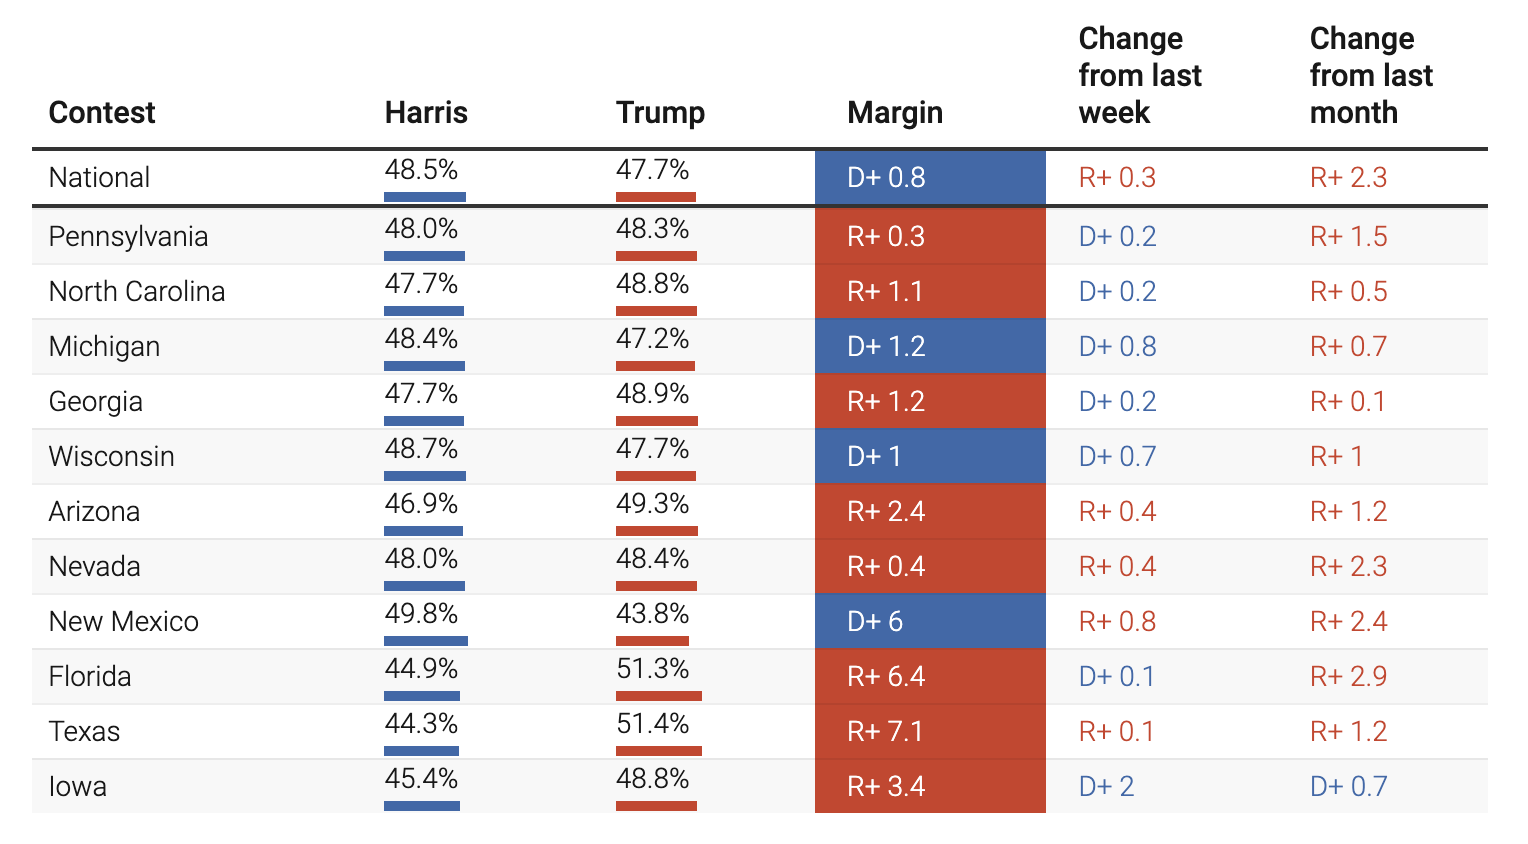












Win Probabilities for Each State: Based on polling data, we approximated each candidate's probability of winning in each state.


*   Pennsylvania: Harris 48.0%, Trump 48.3%
*   North Carolina: Harris 47.7%, Trump 48.8%
*   Michigan: Harris 48.4%, Trump 47.2%
*   Georgia: Harris 47.7%, Trump 48.9%
*   Wisconsin: Harris 48.7%, Trump 47.7%
*   Arizona: Harris 46.9%, Trump 49.3%
*   Nevada: Harris 48.0%, Trump 48.4%



We will use Monte Carlo technique:

The Monte Carlo technique is a powerful statistical method used for solving problems that may be deterministic in nature but are complex enough to be difficult to solve directly. Here’s an overview of why Monte Carlo techniques are used and their importance:

### Purpose and Applications

1. **Uncertainty Quantification**: Monte Carlo methods are particularly useful in situations where there is uncertainty in the input variables. They allow analysts to understand the impact of risk and uncertainty in prediction and forecasting models.

2. **Complex Systems**: They can handle problems with many uncertain parameters and complex interdependencies, making them ideal for fields like finance, engineering, physics, and operations research.

3. **Simulation**: Monte Carlo simulations allow for the modeling of the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables.

4. **Optimization Problems**: The technique is often used in optimization problems, helping to identify the best possible outcome under varying conditions by simulating numerous scenarios.

Yes, the Monte Carlo technique can be applied to U.S. election predictions, particularly in the context of estimating the probability of various outcomes based on uncertain and variable factors. Here’s how it can be relevant:

### Application of Monte Carlo in U.S. Election Predictions

1. **Modeling Uncertainty**: Elections involve numerous uncertain factors, including voter turnout, demographic changes, and shifting public opinion. Monte Carlo simulations can help model these uncertainties by generating a wide range of possible scenarios.

2. **Simulating Voter Behavior**: By simulating different voter behaviors and preferences based on historical data and current polls, analysts can estimate how changes in public sentiment might impact election results.

3. **Assessing Electoral Outcomes**: Monte Carlo methods can be used to estimate the probabilities of different candidates winning based on varying assumptions about turnout and voting patterns. By running thousands of simulations, analysts can produce a distribution of possible outcomes.

4. **Understanding Swing States**: Monte Carlo simulations can be particularly useful in analyzing swing states, where the outcome is uncertain. By simulating various scenarios in these key states, analysts can gain insights into how they might influence the overall election outcome.

5. **Risk Analysis**: Monte Carlo techniques can provide a framework for assessing the risks associated with different electoral strategies, helping campaigns to make informed decisions about where to allocate resources.

In [ ]:
import numpy as np

# Enhanced state polls data with margin and SD
state_polls = {
    'Pennsylvania': {
        'Harris': 48.0,
        'Trump': 48.3,
        'margin': 0.3,  # R+ 0.3
        'sd': 2.5      # Standard polling error
    },
    'North Carolina': {
        'Harris': 47.7,
        'Trump': 48.8,
        'margin': 1.1,  # R+ 1.1
        'sd': 2.5
    },
    'Michigan': {
        'Harris': 48.4,
        'Trump': 47.2,
        'margin': 1.2,  # D+ 1.2
        'sd': 2.5
    },
    'Georgia': {
        'Harris': 47.7,
        'Trump': 48.9,
        'margin': 1.2,  # R+ 1.2
        'sd': 2.5
    },
    'Wisconsin': {
        'Harris': 48.7,
        'Trump': 47.7,
        'margin': 1.0,  # D+ 1.0
        'sd': 2.5
    },
    'Arizona': {
        'Harris': 46.9,
        'Trump': 49.3,
        'margin': 2.4,  # R+ 2.4
        'sd': 2.5
    },
    'Nevada': {
        'Harris': 48.0,
        'Trump': 48.4,
        'margin': 0.4,  # R+ 0.4
        'sd': 2.5
    }
}

# Add electoral votes
electoral_votes = {
    'Pennsylvania': 19,
    'North Carolina': 16,
    'Michigan': 15,
    'Georgia': 16,
    'Wisconsin': 10,
    'Arizona': 11,
    'Nevada': 6
}

def run_election(scenario):
    """Simulate the election based on current polling scenario."""
    results = {'harris': 0, 'trump': 0}

    # Simulate the election based on state polls
    for state, polls in scenario.items():
        base_margin = polls['margin']
        sd = polls['sd']

        # Simulate the election outcome for this state
        simulated_margin = np.random.normal(base_margin, sd)

        if simulated_margin < 0:
            results['harris'] += electoral_votes[state]
        else:
            results['trump'] += electoral_votes[state]

    return results

def monte_carlo_simulation(scenario, num_simulations=1000000):
    ev_needed_harris = 270 - 226  # Electoral votes Harris needs from swing states to reach 270
    ev_needed_trump  = 270 - 219  # Electoral votes Trump needs from swing states to reach 270
    wins_harris = 0
    wins_trump  = 0

    for _ in range(num_simulations):
        result = run_election(scenario)
        wins_harris += (result['harris'] >= ev_needed_harris)
        wins_trump  += (result['trump']  >= ev_needed_trump)

    return {'harris': wins_harris / num_simulations, 'trump': wins_trump / num_simulations}

def run_enhanced_simulation(n_simulations=10000):
    state_wins = {state: {'Harris': 0, 'Trump': 0} for state in state_polls}
    margins = {state: [] for state in state_polls}

    for _ in range(n_simulations):
        for state, polls in state_polls.items():
            base_margin = polls['margin']
            sd = polls['sd']
            simulated_margin = np.random.normal(base_margin, sd)
            margins[state].append(simulated_margin)
            if simulated_margin < 0:
                state_wins[state]['Harris'] += 1
            else:
                state_wins[state]['Trump'] += 1

    print("\nState-by-State Analysis:")
    print("-" * 50)
    for state in state_polls:
        harris_wins = state_wins[state]['Harris']
        harris_prob = (harris_wins / n_simulations) * 100

        margin_mean = np.mean(margins[state])
        margin_sd = np.std(margins[state])
        ci_lower = margin_mean - 1.96 * margin_sd
        ci_upper = margin_mean + 1.96 * margin_sd

        print(f"\n{state}:")
        print(f"Current Margin: {state_polls[state]['margin']:.1f}")
        print(f"Win Probabilities:")
        print(f"Harris: {harris_prob:.1f}%")
        print(f"Trump: {(100-harris_prob):.1f}%")
        print(f"95% Confidence Interval for margin: [{ci_lower:.1f}, {ci_upper:.1f}]")
        print(f"Margin Volatility (SD): {margin_sd:.2f}")

# Run the enhanced simulation
run_enhanced_simulation()

# Run the Monte Carlo Simulation
monte_carlo_results = monte_carlo_simulation(state_polls)
print("\nMonte Carlo Simulation Results:")
print(f"Harris: {monte_carlo_results['harris'] * 100:.2f}% chance of winning.")
print(f"Trump: {monte_carlo_results['trump'] * 100:.2f}% chance of winning.")

def analyze_tipping_points(n_simulations=10000):
    tipping_point_counts = {state: 0 for state in state_polls}

    for _ in range(n_simulations):
        state_margins = {}
        for state in state_polls:
            base_margin = state_polls[state]['margin']
            sd = state_polls[state]['sd']
            simulated_margin = np.random.normal(base_margin, sd)
            state_margins[state] = simulated_margin

        sorted_states = sorted(state_margins.items(), key=lambda x: x[1])
        cumulative_ev = 0
        for state, margin in sorted_states:
            cumulative_ev += electoral_votes[state]
            if cumulative_ev >= 270:
                tipping_point_counts[state] += 1
                break

    print("\nTipping Point Analysis:")
    print("-" * 50)
    for state, count in sorted(tipping_point_counts.items(),
                             key=lambda x: x[1], reverse=True):
        probability = (count / n_simulations) * 100
        if probability > 1:  # Only show significant tipping points
            print(f"{state}: {probability:.1f}% chance of being tipping point")

# Run tipping point analysis
analyze_tipping_points()



State-by-State Analysis:
--------------------------------------------------

Pennsylvania:
Current Margin: 0.3
Win Probabilities:
Harris: 45.2%
Trump: 54.8%
95% Confidence Interval for margin: [-4.6, 5.3]
Margin Volatility (SD): 2.53

North Carolina:
Current Margin: 1.1
Win Probabilities:
Harris: 33.1%
Trump: 66.9%
95% Confidence Interval for margin: [-3.8, 6.0]
Margin Volatility (SD): 2.49

Michigan:
Current Margin: 1.2
Win Probabilities:
Harris: 31.5%
Trump: 68.5%
95% Confidence Interval for margin: [-3.7, 6.1]
Margin Volatility (SD): 2.50

Georgia:
Current Margin: 1.2
Win Probabilities:
Harris: 31.5%
Trump: 68.5%
95% Confidence Interval for margin: [-3.7, 6.1]
Margin Volatility (SD): 2.51

Wisconsin:
Current Margin: 1.0
Win Probabilities:
Harris: 34.6%
Trump: 65.4%
95% Confidence Interval for margin: [-3.9, 5.9]
Margin Volatility (SD): 2.49

Arizona:
Current Margin: 2.4
Win Probabilities:
Harris: 17.4%
Trump: 82.6%
95% Confidence Interval for margin: [-2.5, 7.3]
Margin Volatility (

Now let us try with Bayesian method, it can be a powerful approach for predicting election outcomes, particularly because it allows us to incorporate prior beliefs and update them with new evidence. In the context of your election simulation, we can apply a Bayesian framework to estimate the probabilities of Harris and Trump winning based on prior distributions, poll results, and some assumptions.

Overview of the Bayesian Approach
Define Priors: We start with a prior belief about the probability of each candidate winning. This could be based on historical data or expert opinion.

Likelihood: We then define a likelihood function based on the polling data. This describes how probable the observed polling results are under each candidate's winning scenario.

Posterior Distribution: Using Bayes' theorem, we combine the prior and likelihood to calculate the posterior probability of each candidate winning.

Implementation Steps
Define prior probabilities for Harris and Trump.
Calculate likelihoods based on simulated polling margins.
Update the beliefs to get posterior probabilities.

In [ ]:
import numpy as np

# Enhanced state polls data with margin and SD
state_polls = {
    'Pennsylvania': {
        'Harris': 48.0,
        'Trump': 48.3,
        'margin': 0.3,  # R+ 0.3
        'sd': 2.5      # Standard polling error
    },
    'North Carolina': {
        'Harris': 47.7,
        'Trump': 48.8,
        'margin': 1.1,  # R+ 1.1
        'sd': 2.5
    },
    'Michigan': {
        'Harris': 48.4,
        'Trump': 47.2,
        'margin': 1.2,  # D+ 1.2
        'sd': 2.5
    },
    'Georgia': {
        'Harris': 47.7,
        'Trump': 48.9,
        'margin': 1.2,  # R+ 1.2
        'sd': 2.5
    },
    'Wisconsin': {
        'Harris': 48.7,
        'Trump': 47.7,
        'margin': 1.0,  # D+ 1.0
        'sd': 2.5
    },
    'Arizona': {
        'Harris': 46.9,
        'Trump': 49.3,
        'margin': 2.4,  # R+ 2.4
        'sd': 2.5
    },
    'Nevada': {
        'Harris': 48.0,
        'Trump': 48.4,
        'margin': 0.4,  # R+ 0.4
        'sd': 2.5
    }
}

# Add electoral votes
electoral_votes = {
    'Pennsylvania': 19,
    'North Carolina': 16,
    'Michigan': 15,
    'Georgia': 16,
    'Wisconsin': 10,
    'Arizona': 11,
    'Nevada': 6
}

def bayesian_simulation(num_simulations=10000, prior_harris=0.5, prior_trump=0.5):
    wins_harris = 0
    wins_trump = 0

    for _ in range(num_simulations):
        # Sample from the priors
        harris_win_prob = np.random.beta(prior_harris * 10, (1 - prior_harris) * 10)
        trump_win_prob = np.random.beta(prior_trump * 10, (1 - prior_trump) * 10)

        # Simulate the election based on state polls
        results = {'harris': 0, 'trump': 0}

        for state, polls in state_polls.items():
            base_margin = polls['margin']
            sd = polls['sd']

            # Simulate the election outcome for this state
            simulated_margin = np.random.normal(base_margin, sd)

            if simulated_margin < 0:  # Harris wins
                results['harris'] += electoral_votes[state]
            else:  # Trump wins
                results['trump'] += electoral_votes[state]

        # Update win probabilities based on prior beliefs
        if results['harris'] > results['trump']:
            wins_harris += 1
        else:
            wins_trump += 1

    return {'harris': wins_harris / num_simulations, 'trump': wins_trump / num_simulations}

# Run the Bayesian Simulation
bayesian_results = bayesian_simulation()
print("\nBayesian Simulation Results:")
print(f"Harris: {bayesian_results['harris'] * 100:.2f}% chance of winning.")
print(f"Trump: {bayesian_results['trump'] * 100:.2f}% chance of winning.")



Bayesian Simulation Results:
Harris: 20.31% chance of winning.
Trump: 79.69% chance of winning.
